In [3]:
pip install sktime[all_extras]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 6.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 5.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB

# 1 - What is sktime?
### *(and how is it related to sklearn?)*

- `sktime` is a python library for time-series learning tasks! 
- If you are interested in a more in-depth introduction to sktime - check out a previous [pydata tutorial](https://www.youtube.com/watch?v=ODspi8-uWgo) of ours, and of course visit [our website](https://www.sktime.org/en/latest/index.html)! 
- We *love* new contributors. Even if you are new to open source software developement!  Check out our [website](https://www.sktime.org/en/latest/get_involved/contributing.html) with some tips on how to get started.
- `sktime` is a `scikit-learn` (`sklearn`)-like library - a popular data science library! Why we like `sklearn`:
  - unified interface 
  - modular design
  - parts are composable
  - simple specification language

To scikit learn-like estimators you need to do 3 things:
- **Instantiate** your model of choice
- **Fit** the instance of your model
- Use that fitted instance to **predict** new data!

![](../images/sklearn_advantages-01.png)


### `sktime` is devoted to time-series data analysis:

- **Forecasting** - e.g. Can I predict (and provide uncertainty intervals for) the cost of electricity?
- **Classification** - e.g. - Lets classify healthy and diseased electro-cardiograms!
- **Annotation** - e.g. - For my Fitbit monitor data, can I find the segments where the user was running, sleeping, doing yoga?

### Using `sktime` to do forecasting:

Today's examples will center on examples of **Forecasting** tasks
- Forecasting is different than regression (even though it looks similar) because we are using past observations to predict future observations.
- In regression one instead uses relationship to other variables to predict new values for the target.

/home/codespace/.python/current/lib/python3.10/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


NaiveForecaster()

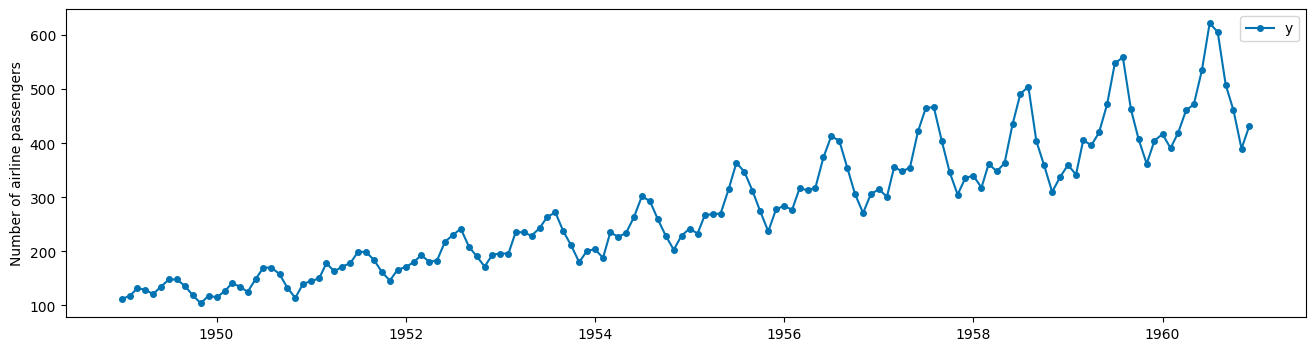

In [1]:
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series
from sktime.forecasting.naive import NaiveForecaster

# Get our airline data:
y = load_airline()
plot_series(y, labels=["y"])

# Instantiate:
forecaster = NaiveForecaster()

# Fit:
forecaster.fit(y)

### 1.4 Forecasting horizons:

- Before we can move on to our last step - **predict** - we need to generate some time indices to predict with!
- We do this in `sktime` with `ForecastingHorizon`s

In [2]:
from sktime.forecasting.base import ForecastingHorizon
import pandas as pd
import numpy as np

# An sktime ForecastingHorizon object:
sktime_fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("1961-01", periods=36, freq="ME")), is_relative=False
)

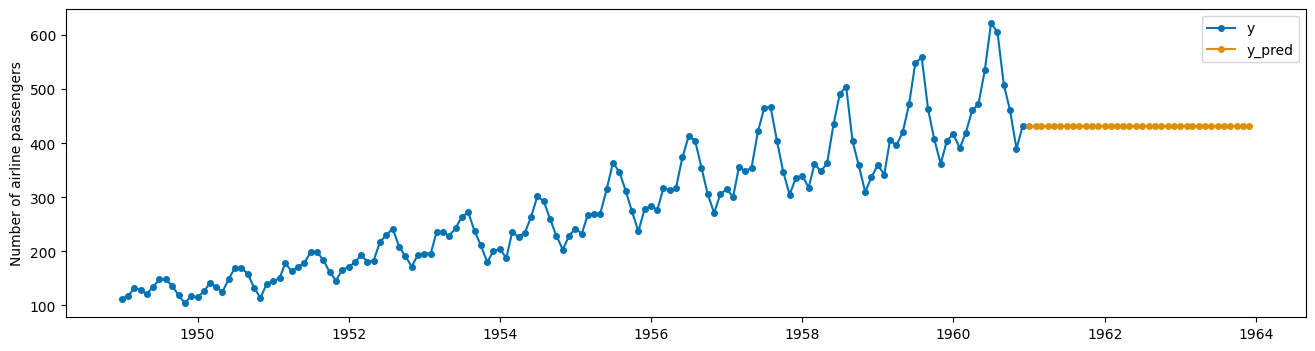

In [3]:
# Predict:
y_pred = forecaster.predict(sktime_fh)

# Check it out:
plot_series(y, y_pred, labels=["y", "y_pred"]);

### 1.5 `sktime` forecasters have tunable parameters that can improve forecasts:

Well - that doesn't look so great! 
- the `NaiveForecaster` is just guessing the last value it saw over an over again.
- one small improvement - we could at least pay attention to seasonal variation. 
- when you instantiate a model you can optionally pass parameters for that instance of the model:
- tuning these parameters often help your model perform better.
- lets check it out:

In [4]:
# Instantiate:
forecaster = NaiveForecaster(sp=12)

# Fit:
forecaster.fit(y)

NaiveForecaster(sp=12)

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

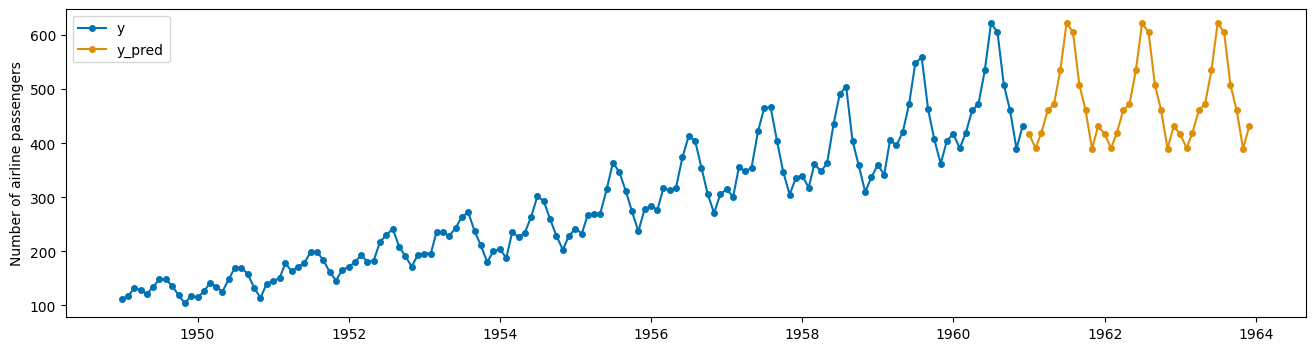

In [5]:
# Predict:
y_pred = forecaster.predict(sktime_fh)
# Check it out:
plot_series(y, y_pred, labels=["y", "y_pred"])

### 1.6 It is easy to swap in a different Forecaster:

Slightly better!
- of course sktime has a large suite of forecasters - which for the most part perform better than the `NaiveForecaster`
- check out our [extended notebook](https://www.sktime.org/en/latest/examples/01_forecasting.html) just on forecasting to go deeper! (and [the appendix](https://www.sktime.org/en/latest/examples/01a_forecasting_sklearn.html))
- because of `sktime` design it is simple to swap in a different forecaster, we can also easily try that out:

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

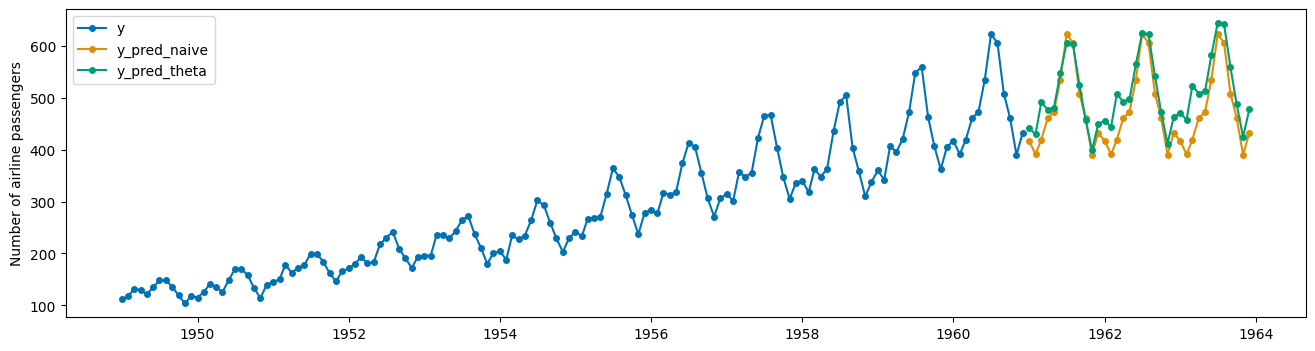

In [6]:
from sktime.forecasting.theta import ThetaForecaster

# Instantiate:
forecaster = ThetaForecaster(sp=12)

# Fit:
forecaster.fit(y)

# Predict:
y_pred_theta = forecaster.predict(sktime_fh)

# Check it out:
plot_series(y, y_pred, y_pred_theta, labels=["y", "y_pred_naive", "y_pred_theta"])

### 1.7 Forecasting wrapup:

Some important topics related to forecasting that we did not cover today:
- `sktime` can facilitate the creation of uncertainty intervals for predictions - very important!
- we also support multivariate and hierarchical forecasts.
- reminder - all this info and mroe can be found in our [dedicated forecasting notebook](https://www.sktime.org/en/latest/examples/01_forecasting.html)! 


### 1.8 Summary/What is next!

- `sktime` combines a library of dedicated time-series models with the tools that makes it easy to quickly and easily deploy them. 
- Our design makes it easy for you to try out different model parameters, and/or different models all together. 
- Next we will hear about how we can make these forecasts even better by transforming our data!


### Credits: notebook 1 - Sktime intro, toolbox features, Forecasting

notebook creation: miraep8

(some vignettes based on existing `sktime` tutorials credit: fkiraly, mloning and dbartl)
Big thank you to the entire `sktime` team as well!

## Example YAZ data

In [7]:
yaztargets = pd.read_csv("https://raw.githubusercontent.com/opimwue/ddop/master/ddop/datasets/data/yaz_target.csv")
yazdata = pd.read_csv("https://raw.githubusercontent.com/opimwue/ddop/master/ddop/datasets/data/yaz_data.csv")



In [8]:
yaztargets.columns

Index(['calamari', 'fish', 'shrimp', 'chicken', 'koefte', 'lamb', 'steak'], dtype='object')

In [9]:
yazdata.columns

Index(['date', 'weekday', 'month', 'year', 'is_holiday', 'is_closed',
       'weekend', 'wind', 'clouds', 'rain', 'sunshine', 'temperature'],
      dtype='object')

In [14]:
yaz_simple = pd.DataFrame({'date':yazdata['date'], 'demand':yaztargets['steak']+yaztargets['calamari']+yaztargets['fish']+yaztargets['chicken']+yaztargets['koefte']+yaztargets['lamb']})
yaz_simple['date'] = pd.to_datetime(yaz_simple['date'])
yaz_simple.set_index('date',inplace=True)
yaz_simple = yaz_simple.asfreq('D').fillna(0)  # Forward fill

In [15]:
yaz_simple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 765 entries, 2013-10-04 to 2015-11-07
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   demand  765 non-null    int64
dtypes: int64(1)
memory usage: 12.0 KB


In [75]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
forecaster = ExponentialSmoothing(trend="add", seasonal="add")
forecaster.fit(yaz_simple)

ExponentialSmoothing(seasonal='add', trend='add')

In [76]:
forecaster.get_fitted_params()

{'initial_level': 131.31826424838565,
 'initial_slope': None,
 'initial_seasons': array([ 13.14648029,  77.27729624, -35.60180871, -25.99720273,
        -19.48861029,  -8.52642735,   8.27998399]),
 'aic': 5131.403932048231,
 'bic': 5182.442566220323,
 'aicc': 5131.888619132119}

In [77]:
sktime_fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("2015-10-01", periods=36, freq="D")), is_relative=False
)
sktime_fh

ForecastingHorizon(['2015-10-01', '2015-10-02', '2015-10-03', '2015-10-04',
             '2015-10-05', '2015-10-06', '2015-10-07', '2015-10-08',
             '2015-10-09', '2015-10-10', '2015-10-11', '2015-10-12',
             '2015-10-13', '2015-10-14', '2015-10-15', '2015-10-16',
             '2015-10-17', '2015-10-18', '2015-10-19', '2015-10-20',
             '2015-10-21', '2015-10-22', '2015-10-23', '2015-10-24',
             '2015-10-25', '2015-10-26', '2015-10-27', '2015-10-28',
             '2015-10-29', '2015-10-30', '2015-10-31', '2015-11-01',
             '2015-11-02', '2015-11-03', '2015-11-04', '2015-11-05'],
            dtype='period[D]', is_relative=False)

In [78]:
y_pred = forecaster.predict(sktime_fh)

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='demand'>)

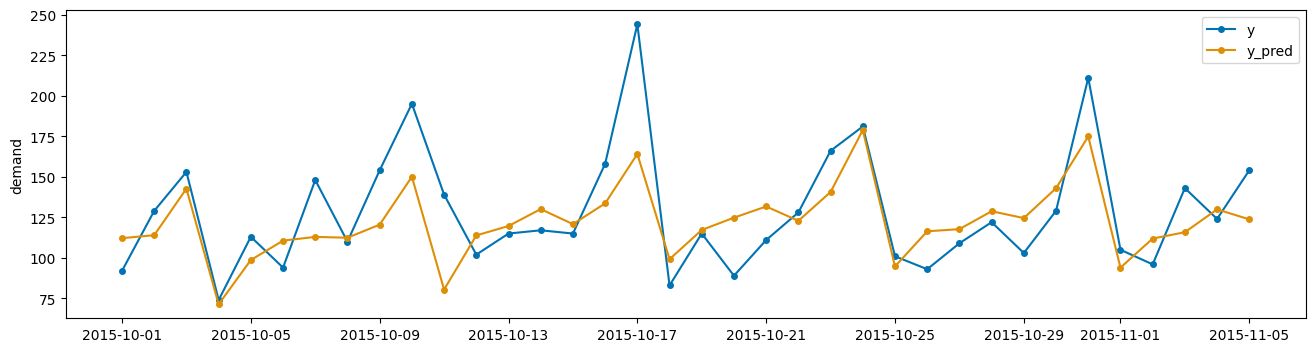

In [83]:
plot_series(trueValues, y_pred, labels=["y", "y_pred"])

### Including evaluation scores

In [85]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

In [86]:
sktime_fh

ForecastingHorizon(['2015-10-01', '2015-10-02', '2015-10-03', '2015-10-04',
             '2015-10-05', '2015-10-06', '2015-10-07', '2015-10-08',
             '2015-10-09', '2015-10-10', '2015-10-11', '2015-10-12',
             '2015-10-13', '2015-10-14', '2015-10-15', '2015-10-16',
             '2015-10-17', '2015-10-18', '2015-10-19', '2015-10-20',
             '2015-10-21', '2015-10-22', '2015-10-23', '2015-10-24',
             '2015-10-25', '2015-10-26', '2015-10-27', '2015-10-28',
             '2015-10-29', '2015-10-30', '2015-10-31', '2015-11-01',
             '2015-11-02', '2015-11-03', '2015-11-04', '2015-11-05'],
            dtype='period[D]', is_relative=False)

In [87]:
mask = (yaz_simple.index >= pd.Timestamp('2015-10-01')) & (yaz_simple.index <= pd.Timestamp('2015-11-05'))

In [88]:
trueValues = yaz_simple.loc[mask]

In [89]:
trueValues

,demand
2015-10-01,92
2015-10-02,129
2015-10-03,153
2015-10-04,74
2015-10-05,113
2015-10-06,94
2015-10-07,148
2015-10-08,110
2015-10-09,154
2015-10-10,195


In [57]:
y_pred

,demand
2014-10-01,87.968332
2014-10-02,87.635028
2014-10-03,112.809618
2014-10-04,118.694509
2014-10-05,129.713327
...,...
2015-01-24,108.716095
2015-01-25,166.484946
2015-01-26,132.498135
2015-01-27,95.880195


MAPE: 0.14781734614599756


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='demand'>)

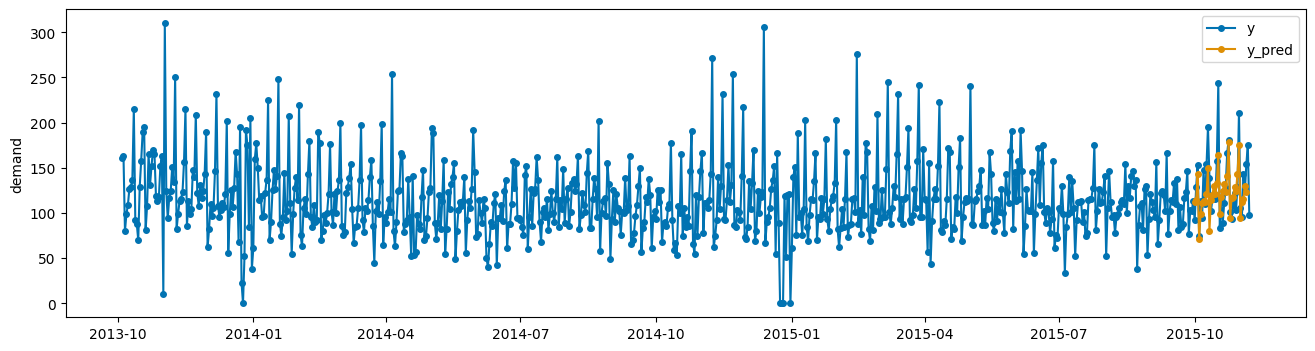

In [91]:
mape = mean_absolute_percentage_error(trueValues, y_pred)
print(f'MAPE: {mape}')
plot_series(yaz_simple, y_pred, labels=["y", "y_pred"])

## With train test split - but this has problems in out simple setup!

MAPE: 0.23114428285051714


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='demand'>)

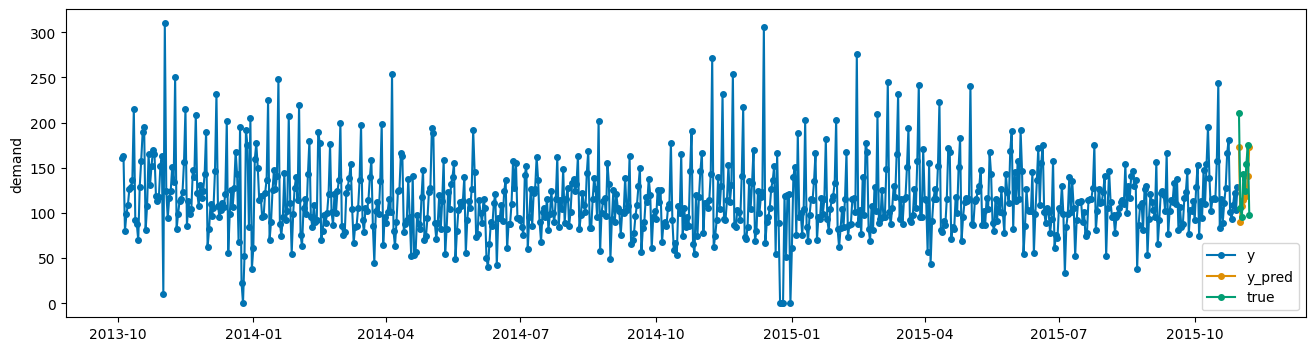

In [98]:
from sktime.forecasting.model_selection import temporal_train_test_split

y_train, y_test = temporal_train_test_split(yaz_simple, test_size=0.01)
model = ExponentialSmoothing(trend="add", seasonal="add")
model.fit(y_train)

# Make predictions
fh = list(range(1, len(y_test) + 1))    # Forecast horizon (number of periods to predict)
y_pred = model.predict(fh=fh)

# Evaluate the model
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAPE: {mape}')
plot_series(y_train, y_pred, y_test, labels=["y", "y_pred", "true"])

## Double Exponential Smoothing